In [42]:
#imports
import yfinance as yf
import pandas as pd
import numpy as np
import streamlit as st
from PIL import Image
from urllib.request import urlopen
from MCForecastTools_copy import MCSimulation
%matplotlib inline

In [43]:
#titles
st.title("Crypto Currency Daily Prices")
st.header("Main Dashboard")
st.subheader("you can add more crypto in code")




DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [44]:
Bitcoin = 'BTC-USD'
Ethereum = 'ETH-USD'
Ripple = 'XRP-USD'
Bitcoincash = 'BCH-USD'
Cardano = 'ADA-USD'

In [45]:
# Download Stock Data

st.write("# Download Stock Data")

BTC = yf.download(Bitcoin, period="max", interval="1d")
ETH = yf.download(Ethereum, period="max", interval="1d")
XRP = yf.download(Ripple, period="max", interval="1d")
BCH = yf.download(Bitcoincash, period="max", interval="1d")
ADA = yf.download(Cardano, period="max", interval="1d")

BTC
ETH
XRP
BCH
ADA

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,0.025160,0.035060,0.025006,0.032053,0.032053,18716200
2017-11-10,0.032219,0.033348,0.026451,0.027119,0.027119,6766780
2017-11-11,0.026891,0.029659,0.025684,0.027437,0.027437,5532220
2017-11-12,0.027480,0.027952,0.022591,0.023977,0.023977,7280250
2017-11-13,0.024364,0.026300,0.023495,0.025808,0.025808,4419440
...,...,...,...,...,...,...
2022-11-24,0.318333,0.320685,0.312540,0.316458,0.316458,221490892
2022-11-25,0.316420,0.316827,0.308314,0.314989,0.314989,205372207
2022-11-26,0.314953,0.321897,0.312215,0.313790,0.313790,206097213


In [46]:
# Starting to clean dataframes and get them ready to concact
All_coins_hist_df = pd.concat([BTC, ETH, XRP, BCH, ADA],axis=1, keys=['BTC', 'ETH', 'XRP', 'BCH', 'ADA'])
All_coins_hist_df = All_coins_hist_df.dropna()

display(All_coins_hist_df.head())
display(All_coins_hist_df.tail())



BTC                                                      \
                   Open         High          Low        Close    Adj Close   
Date                                                                          
2017-11-09  7446.830078  7446.830078  7101.520020  7143.580078  7143.580078   
2017-11-10  7173.729980  7312.000000  6436.870117  6618.140137  6618.140137   
2017-11-11  6618.609863  6873.149902  6204.220215  6357.600098  6357.600098   
2017-11-12  6295.450195  6625.049805  5519.009766  5950.069824  5950.069824   
2017-11-13  5938.250000  6811.189941  5844.290039  6559.490234  6559.490234   

                               ETH                                      ...  \
                Volume        Open        High         Low       Close  ...   
Date                                                                    ...   
2017-11-09  3226249984  308.644989  329.451996  307.056000  320.884003  ...   
2017-11-10  5208249856  320.670990  324.717987  294.541992  299.252991  ...   
2017-11-11  4908680192  298.585999  319.453003  298.191986  314.681000  ...   
2017-11-12  8957349888  314.690002  319.153015  298.513000  307.907990  ...   
2017-11-13  6263249920  307.024994  328.415009  307.024994  316.716003  ...   

                    BCH                                               ADA  \
                    Low        Close    Adj Close        Volume      Open   
Date                                                                        
2017-11-09   619.257996   654.302979   654.302979  7.103870e+08  0.025160   
2017-11-10   651.775024  1007.419983  1007.419983  5.195420e+09  0.032219   
2017-11-11   910.721985  1340.449951  1340.449951  5.139770e+09  0.026891   
2017-11-12  1215.579956  1388.859985  1388.859985  8.371320e+09  0.027480   
2017-11-13  1043.000000  1353.989990  1353.989990  4.850570e+09  0.024364   

                                                                
                High       Low     Close Adj Close      Volume  
Date                                                            
2017-11-09  0.035060  0.025006  0.032053  0.032053  18716200.0  
2017-11-10  0.033348  0.026451  0.027119  0.027119   6766780.0  
2017-11-11  0.029659  0.025684  0.027437  0.027437   5532220.0  
2017-11-12  0.027952  0.022591  0.023977  0.023977   7280250.0  
2017-11-13  0.026300  0.023495  0.025808  0.025808   4419440.0  

[5 rows x 30 columns]

BTC                                            \
                    Open          High           Low         Close   
Date                                                                 
2022-11-24  16611.636719  16771.474609  16501.767578  16604.464844   
2022-11-25  16602.269531  16603.316406  16388.404297  16521.841797   
2022-11-26  16521.576172  16666.863281  16416.228516  16464.281250   
2022-11-27  16463.882812  16594.406250  16437.025391  16444.626953   
2022-11-30  16454.935547  16890.541016  16450.660156  16856.724609   

                                               ETH                            \
               Adj Close       Volume         Open         High          Low   
Date                                                                           
2022-11-24  16604.464844  26129037414  1183.345093  1211.627441  1180.379761   
2022-11-25  16521.841797  18678255976  1203.799438  1203.799438  1174.823364   
2022-11-26  16464.281250  18000008764  1198.790527  1227.038086  1198.097900   
2022-11-27  16444.626953  20443898509  1205.905273  1220.349487  1195.039062   
2022-11-30  16856.724609  25679925248  1217.811890  1275.588867  1215.986694   

                         ...         BCH                                       \
                  Close  ...         Low       Close   Adj Close       Volume   
Date                     ...                                                    
2022-11-24  1203.983154  ...  113.340309  115.918991  115.918991  289855568.0   
2022-11-25  1198.925903  ...  113.314987  113.823303  113.823303  206165000.0   
2022-11-26  1205.897949  ...  111.863701  112.441277  112.441277  192168490.0   
2022-11-27  1195.126953  ...  111.155418  111.241226  111.241226  154665479.0   
2022-11-30  1268.124023  ...  111.002213  113.340744  113.340744  182388416.0   

                 ADA                                                       
                Open      High       Low     Close Adj Close       Volume  
Date                                                                       
2022-11-24  0.318333  0.320685  0.312540  0.316458  0.316458  221490892.0  
2022-11-25  0.316420  0.316827  0.308314  0.314989  0.314989  205372207.0  
2022-11-26  0.314953  0.321897  0.312215  0.313790  0.313790  206097213.0  
2022-11-27  0.313793  0.319191  0.312288  0.312454  0.312454  167898046.0  
2022-11-30  0.309627  0.318469  0.309122  0.315689  0.315689  206936128.0  

[5 rows x 30 columns]

In [ ]:
MC_equal_dist_5year = MCSimulation(
    portfolio_data = All_coins_hist_df,
    weights = [0.20,0.20,0.20,0.20,0.20], #weights need to equal pie chart values
    num_simulation = 500,
    num_trading_days = 365*5 # The 5 will need to become a variable based off of what the user picks 5,10,15,20,25,30yrs
)

In [48]:
MC_equal_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.


KeyboardInterrupt: 

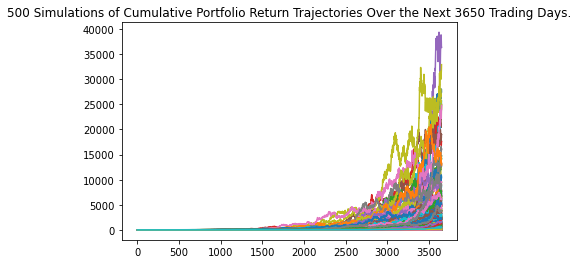

In [ ]:
line_plot_5yr = MC_equal_dist.plot_simulation()

In [ ]:
tbl_5yr = MC_equal_dist.summarize_cumulative_return()
print(tbl)

count             500.000000
mean             1739.165201
std              4031.500598
min                 1.501434
25%               168.089724
50%               481.681598
75%              1303.384050
max             36352.744263
95% CI Lower       18.735624
95% CI Upper    13208.785943
Name: 3650, dtype: float64


In [ ]:
MC_equal_dist_10year = MCSimulation(
    portfolio_data = All_coins_hist_df,
    weights = [0.20,0.20,0.20,0.20,0.20],
    num_simulation = 500,
    num_trading_days = 365*10
)

In [ ]:
MC_equal_dist_10year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/milluminatillc/Project-1-Repo-AQML/MCForecastTools_copy.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.013206,1.076792,1.016597,1.047791,0.996181,1.020555,1.007926,1.005412,0.967157,1.042525,...,0.994252,1.017033,1.000954,1.006975,1.038622,0.949985,0.984543,1.029981,1.007393,1.049753
2,1.070293,1.103327,1.033183,1.021405,0.997251,1.008480,1.004387,0.986248,0.986804,1.078330,...,0.999733,1.026632,1.018480,1.027679,1.033618,0.944488,0.951811,1.034965,1.037784,1.035791
3,1.085760,1.079562,1.059288,1.003057,1.013312,1.021619,1.005469,1.017154,1.076373,1.083188,...,1.028041,1.065341,0.970300,1.026399,1.040662,0.899136,0.953762,1.022266,1.064980,1.082226
4,1.104691,1.045427,1.039663,1.019647,1.024157,1.016615,1.008257,0.987345,1.073782,1.090373,...,1.033296,1.021710,0.998896,1.037866,1.076146,0.904246,0.935781,1.010311,1.093073,1.150972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3646,812.818832,258.425993,262.070433,3379.785912,137.349328,39.075340,120221.874314,596.223858,111.515294,464.051098,...,4571.292313,2485.452849,1698.566902,206.315486,913.242866,484.359500,595.806999,1032.396110,3547.800967,711.125763
3647,814.624789,249.799096,251.592070,3354.837344,133.917186,40.849425,119844.892971,609.261729,109.738667,462.049105,...,4664.193265,2529.280397,1732.882264,205.881247,898.985918,455.705122,576.513573,1046.144982,3481.804856,698.793041
3648,820.977074,252.416094,257.723669,3393.531997,134.277974,41.175578,123465.116220,604.898453,105.638905,471.384549,...,4708.027278,2731.473773,1730.267361,208.063560,885.871177,451.403650,570.909015,1091.565299,3553.640784,700.784829
3649,830.341570,255.479860,260.419251,3259.562265,124.101942,41.130492,119408.233984,583.465485,100.720681,459.690866,...,4677.442072,2629.867613,1703.964390,214.503864,887.048333,445.647807,571.611077,1134.378630,3598.694300,651.094432


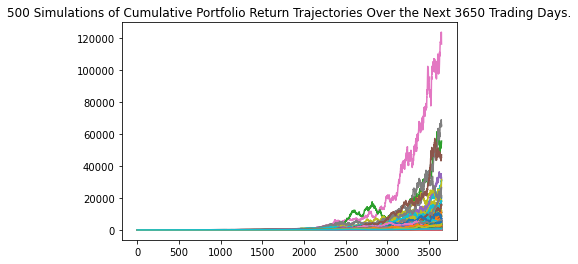

In [ ]:
line_plot_10yr = MC_equal_dist_10year.plot_simulation()

In [ ]:
tbl_10yr = MC_equal_dist_10year.summarize_cumulative_return()
print(tbl_10yr)

count              500.000000
mean              2311.880028
std               7617.119544
min                  2.610470
25%                177.566106
50%                528.140642
75%               1675.415683
max             116077.670778
95% CI Lower        20.748625
95% CI Upper     15762.030869
Name: 3650, dtype: float64


In [ ]:
MC_equal_dist_20year = MCSimulation(
    portfolio_data = All_coins_hist_df,
    weights = [0.20,0.20,0.20,0.20,0.20],
    num_simulation = 500,
    num_trading_days = 365*20
)

In [ ]:
MC_equal_dist_20year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/milluminatillc/Project-1-Repo-AQML/MCForecastTools_copy.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000e+00
1,1.027782,1.036798e+00,1.011604,0.998028,1.012380e+00,1.047438,1.040160,0.969682,1.002493,0.990503,...,1.028635e+00,9.714234e-01,1.018283,1.061593,9.638723e-01,1.031704,0.984668,1.001865,0.988155,1.018546e+00
2,1.021106,1.041342e+00,1.050265,0.974072,1.038545e+00,1.008943,0.985813,0.998638,0.997879,1.013153,...,1.043534e+00,9.301981e-01,1.005511,1.096650,9.326826e-01,1.006693,0.986758,1.016850,0.970854,1.017686e+00
3,1.027257,1.092232e+00,1.068657,0.986134,1.091804e+00,0.936436,1.009956,0.959586,1.017879,1.056786,...,1.049364e+00,8.950365e-01,1.038400,1.106363,9.322171e-01,1.026581,0.935480,1.024283,0.937894,1.045923e+00
4,1.049309,1.116356e+00,1.039095,0.953913,1.098241e+00,0.900138,0.968178,0.965782,1.036419,1.086045,...,9.940915e-01,9.334374e-01,1.075700,1.152510,9.638318e-01,0.956723,0.947724,1.085515,0.926730,1.050978e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7296,57235.145559,2.791023e+08,167928.033168,290715.331658,3.069449e+06,30543.198997,20276.410728,10231.682511,13665.676473,4686.358930,...,8.248585e+06,2.419004e+06,401060.669429,1104.448932,1.431393e+06,4782.659059,307575.163441,129052.753877,1634.389392,1.116780e+07
7297,55721.385772,2.793407e+08,160235.535867,302261.656090,3.027656e+06,29777.152225,20527.189139,10226.721191,14243.608960,4660.644258,...,8.268084e+06,2.373437e+06,400454.699817,1130.904500,1.428278e+06,4836.824134,317817.031907,130152.248293,1561.800776,1.063133e+07
7298,55184.840994,2.847880e+08,162161.226654,294328.140746,3.026331e+06,30098.106473,20151.322384,10061.393537,14817.442265,4625.163354,...,8.349177e+06,2.480079e+06,407327.070126,1112.330181,1.384294e+06,5054.397008,318853.460711,131249.148560,1516.015338,1.063917e+07
7299,55093.462064,2.978413e+08,170116.269215,296148.775779,2.960958e+06,30269.634840,20171.398756,10070.398322,14601.523454,4677.374442,...,8.285740e+06,2.537755e+06,409220.472214,1154.221386,1.323595e+06,5028.590264,320965.081649,127348.287661,1527.955486,1.069251e+07


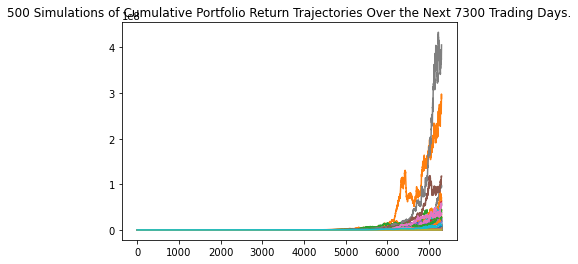

In [ ]:
line_plot_20yr = MC_equal_dist_20year.plot_simulation()

In [ ]:
tbl_20yr = MC_equal_dist_20year.summarize_cumulative_return()
print(tbl_10yr)

count              500.000000
mean              2311.880028
std               7617.119544
min                  2.610470
25%                177.566106
50%                528.140642
75%               1675.415683
max             116077.670778
95% CI Lower        20.748625
95% CI Upper     15762.030869
Name: 3650, dtype: float64


In [ ]:
# Ticker Data

BTC_Data =  yf.Ticker(Bitcoin)
ETH_Data =  yf.Ticker(Ethereum)
XRP_Data =  yf.Ticker(Ripple)
BCH_Data =  yf.Ticker(Bitcoincash)
ADA_Data = yf.Ticker(Cardano)


In [ ]:
BTC_Data

yfinance.Ticker object <BTC-USD>

In [ ]:
# Stock - Info

st.write("# Stock - Info")
btc_info = BTC_Data.info
eth_info = ETH_Data.info
xrp_info = XRP_Data.info
bch_info = BCH_Data.info
ada_info = ADA_Data.info

btc_info.keys()
eth_info.keys()
xrp_info.keys()
bch_info.keys()
ada_info.keys()

dict_keys(['companyOfficers', 'twitter', 'name', 'startDate', 'description', 'maxAge', 'exchange', 'shortName', 'exchangeTimezoneName', 'exchangeTimezoneShortName', 'isEsgPopulated', 'gmtOffSetMilliseconds', 'quoteType', 'symbol', 'messageBoardId', 'market', 'previousClose', 'regularMarketOpen', 'twoHundredDayAverage', 'trailingAnnualDividendYield', 'payoutRatio', 'volume24Hr', 'regularMarketDayHigh', 'navPrice', 'averageDailyVolume10Day', 'totalAssets', 'regularMarketPreviousClose', 'fiftyDayAverage', 'trailingAnnualDividendRate', 'open', 'toCurrency', 'averageVolume10days', 'expireDate', 'yield', 'algorithm', 'dividendRate', 'exDividendDate', 'beta', 'circulatingSupply', 'regularMarketDayLow', 'priceHint', 'currency', 'regularMarketVolume', 'lastMarket', 'maxSupply', 'openInterest', 'marketCap', 'volumeAllCurrencies', 'strikePrice', 'averageVolume', 'priceToSalesTrailing12Months', 'dayLow', 'ask', 'ytdReturn', 'askSize', 'volume', 'fiftyTwoWeekHigh', 'forwardPE', 'fromCurrency', 'fiv

In [ ]:
btc_info

{'companyOfficers': [],
 'name': 'Bitcoin',
 'startDate': 1367107200,
 'description': 'Bitcoin (BTC) is a cryptocurrency . Users are able to generate BTC through the process of mining. Bitcoin has a current supply of 19,218,537. The last known price of Bitcoin is 16,145.42423397 USD and is down -2.15 over the last 24 hours. It is currently trading on 9860 active market(s) with $22,751,428,661.02 traded over the last 24 hours. More information can be found at https://bitcoin.org/.',
 'maxAge': 1,
 'exchange': 'CCC',
 'shortName': 'Bitcoin USD',
 'exchangeTimezoneName': 'UTC',
 'exchangeTimezoneShortName': 'UTC',
 'isEsgPopulated': False,
 'gmtOffSetMilliseconds': '0',
 'quoteType': 'CRYPTOCURRENCY',
 'symbol': 'BTC-USD',
 'messageBoardId': 'finmb_BTC_CCC',
 'market': 'ccc_market',
 'previousClose': 16211.814,
 'regularMarketOpen': 16211.814,
 'twoHundredDayAverage': 21850.467,
 'trailingAnnualDividendYield': None,
 'payoutRatio': None,
 'volume24Hr': 24564824064,
 'regularMarketDayHigh'

In [ ]:
# Stock - Histories

st.write("# Stock - History")
btc_hist = BTC_Data.history(period="max")
eth_hist = ETH_Data.history(period="max")
xrp_hist = XRP_Data.history(period="max")
bch_hist = BCH_Data.history(period="max")
ada_hist = ADA_Data.history(period="max")


btc_hist


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0,0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0,0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0,0
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0,0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0,0
...,...,...,...,...,...,...,...
2022-11-24 00:00:00+00:00,16611.636719,16771.474609,16501.767578,16604.464844,26129037414,0,0
2022-11-25 00:00:00+00:00,16602.269531,16603.316406,16388.404297,16521.841797,18678255976,0,0
2022-11-26 00:00:00+00:00,16521.576172,16666.863281,16416.228516,16464.281250,18000008764,0,0
